# Split digits

The goal is to split the input image into separated digits that will be then used as input for the network.

In [1]:
import Segmentation as seg
from PIL import Image, ImageDraw, ImageColor, ImageEnhance, ImageFilter

In [2]:
image_path = "img-20201229-22648.png"
original_img = Image.open(image_path)

segmentation = seg.GraphBasedSegmentation(image_path)
segmentation.segment(k=4500, min_size=100, preprocessing=True, contrast=1.5, gaussian_blur=2.3)
segmentation.generate_image()
segmentation.draw_boxes()

Building graph...
Graph built in 0.85s.

Segmenting...
Segmentation done in 1.27s.

Removing componentes having size less than 100...
Removed components in 0.396s.

Defining regions...
Regions defined in 0.0315s.

Generating image...
Image generated in 0.149s.

Searching boundaries...
Boundaries found in 0.888s.

Drawing boxes...
Boxes drawn in 0.000839s.



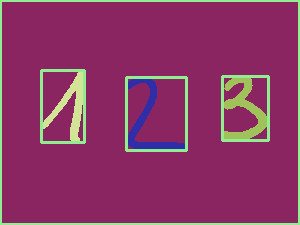

In [3]:
segmentation.boxed_img

In [4]:
def __regions_area(boundaries):
    """ Compute the area of each region.

    Returns:
        areas (dict of ints): dictionary containing, for each region, its area
    """
    areas = {}
    for region, extremes in boundaries.items():
        A = extremes['max_row'] - extremes['min_row']
        B = extremes['max_col'] - extremes['min_col']
        areas[region] = A * B
    return areas

In [5]:
boundaries = segmentation.boundaries.copy()

areas = __regions_area(segmentation.boundaries)

boundaries[max(areas, key=lambda k: areas[k])] = None

segm = segmentation.preprocessed_arr.copy()

boundaries

{0: {'min_row': 76, 'max_row': 140, 'min_col': 222, 'max_col': 268},
 1: {'min_row': 70, 'max_row': 142, 'min_col': 41, 'max_col': 84},
 2: {'min_row': 77, 'max_row': 150, 'min_col': 126, 'max_col': 186},
 3: None}

In [6]:
digits = {}
counter = 0
for _, extremes in boundaries.items():
    if extremes is None:
        continue
    a = extremes['min_row']
    b = extremes['max_row'] + 1
    c = extremes['min_col']
    d = extremes['max_col'] + 1
    digits[counter] = segm[a:b,c:d].copy()
    counter += 1

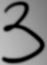

In [7]:
q = digits[0].copy()
im = Image.fromarray(q)
im

In [8]:
im.resize((28, 28), Image.ANTIALIAS)